# Accidents

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

In [3]:
from IPython.core.pylabtools import figsize
figsize(14, 7)

### Read data

In [4]:
data_path = '../../data/'

In [5]:
df = pd.read_csv(os.path.join(data_path, 'accidents.csv'))

In [6]:
df.head()

,accident_id,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,time,1st_road_class,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,lsoa_of_accident_location,police_force,local_authority_district,local_authority_highway,target
0,359433,519310.0,188730.0,-0.279323,51.584754,2,1,2016-01-11,02:30,A,...,1,Dry,None,None,Urban,E01000543,Metropolitan Police,Brent,Brent,0
1,446617,551920.0,174560.0,0.184928,51.449595,1,1,2016-01-11,00:37,A,...,1,Dry,None,None,Urban,E01000375,Metropolitan Police,Bexley,Bexley,0
2,342312,505930.0,183850.0,-0.473837,51.543563,1,1,2016-01-11,01:25,A,...,1,Dry,None,None,Urban,E01033725,Metropolitan Police,Hillingdon,Hillingdon,0
3,495118,527770.0,168930.0,-0.164442,51.404958,1,1,2016-01-11,09:15,A,...,1,Dry,None,None,Urban,E01003379,Metropolitan Police,Merton,Merton,0
4,595500,510740.0,177230.0,-0.406580,51.483139,2,1,2016-01-11,07:53,A,...,1,Dry,None,None,Urban,E01002583,Metropolitan Police,Hounslow,Hounslow,0


In [7]:
df.shape

(137599, 30)

In [8]:
'Number of accidents in the training set: {:,}'.format(df.shape[0])

'Number of accidents in the training set: 137,599'

In [9]:
df.columns

Index(['accident_id', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties',
       'date', 'time', '1st_road_class', '1st_road_number', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'lsoa_of_accident_location', 'police_force',
       'local_authority_district', 'local_authority_highway', 'target'],
      dtype='object')

In [10]:
df.dtypes

accident_id                                  int64
location_easting_osgr                      float64
location_northing_osgr                     float64
longitude                                  float64
latitude                                   float64
number_of_vehicles                           int64
number_of_casualties                         int64
date                                        object
time                                        object
1st_road_class                              object
1st_road_number                              int64
road_type                                    int64
speed_limit                                float64
junction_detail                             object
junction_control                            object
2nd_road_class                              object
2nd_road_number                            float64
pedestrian_crossing-human_control           object
pedestrian_crossing-physical_facilities     object
light_conditions               

Is there any null values?

In [11]:
df.isnull().mean()

accident_id                                0.0
location_easting_osgr                      0.0
location_northing_osgr                     0.0
longitude                                  0.0
latitude                                   0.0
number_of_vehicles                         0.0
number_of_casualties                       0.0
date                                       0.0
time                                       0.0
1st_road_class                             0.0
1st_road_number                            0.0
road_type                                  0.0
speed_limit                                0.0
junction_detail                            0.0
junction_control                           0.0
2nd_road_class                             0.0
2nd_road_number                            0.0
pedestrian_crossing-human_control          0.0
pedestrian_crossing-physical_facilities    0.0
light_conditions                           0.0
weather_conditions                         0.0
road_surface_

### Target

Severity of accident: 
* serious = 1
* slight = 0

In [12]:
df.target.value_counts()

0    113999
1     23600
Name: target, dtype: int64

**Only 17% of the accidents are classified as severe**

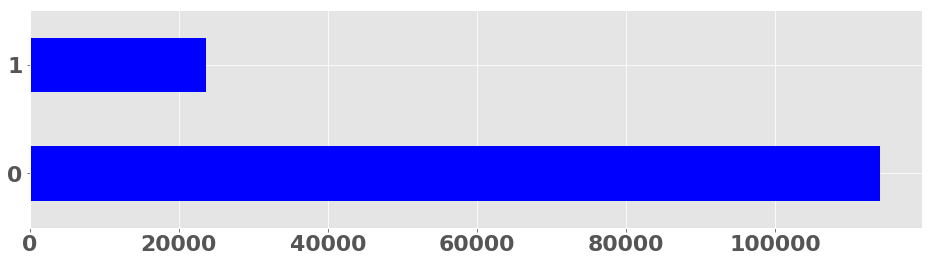

In [13]:
fig = pd.value_counts(df['target'].values, sort=True).plot.barh(
    figsize=(16, 4), 
    color='b')

In [14]:
fig.get_figure().savefig('../../figures/EDA_target.png', bbox_inches="tight")

### Num vehicles

In [15]:
df['number_of_vehicles'].value_counts()

2     83435
1     39841
3     11052
4      2457
5       521
6       170
7        72
8        26
9        11
10        6
11        4
16        2
13        1
12        1
Name: number_of_vehicles, dtype: int64

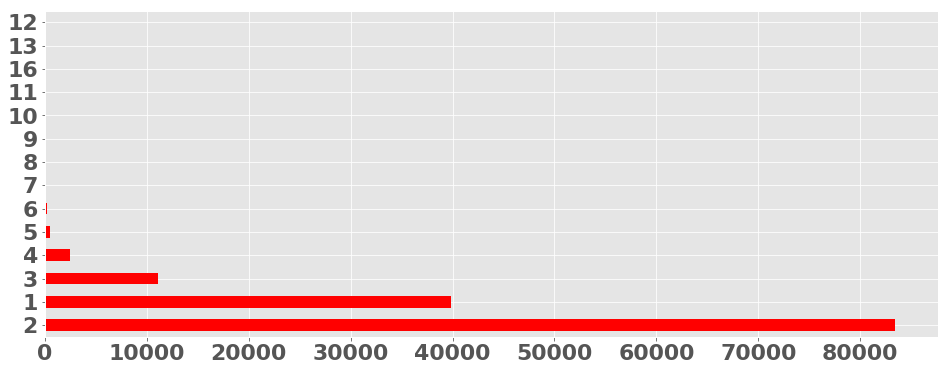

In [16]:
fig = pd.value_counts(df['number_of_vehicles'].values, sort=True).plot.barh(
    figsize=(16, 6),
    color='r')

In [17]:
fig.get_figure().savefig('../../figures/EDA_num_vehicles.png', bbox_inches="tight")

### Number of casualties

In [18]:
df['number_of_casualties'].value_counts()

1     107584
2      20679
3       5993
4       2095
5        775
6        278
7         85
8         42
9         20
10        16
12        10
11         5
14         3
15         3
27         2
16         2
19         2
13         1
18         1
21         1
23         1
58         1
Name: number_of_casualties, dtype: int64

### Date and time

In [19]:
df['date'].agg([min, max])

min    2016-01-01
max    2016-12-31
Name: date, dtype: object

In [20]:
df['time'].agg([min, max])

min    00:01
max    23:59
Name: time, dtype: object

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['date'].dtype

dtype('<M8[ns]')

In [23]:
num_accidents_daily = df.set_index('date')['accident_id'].resample('d').count()

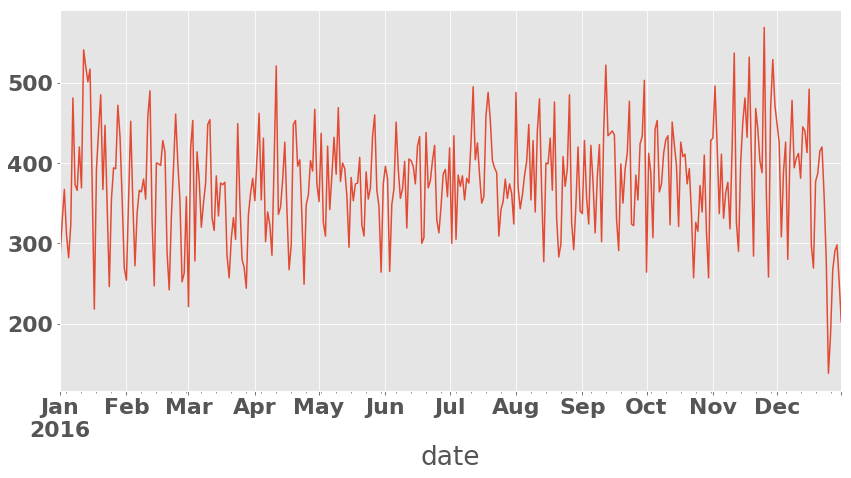

In [24]:
fig = num_accidents_daily.plot()

In [ ]:
fig.get_figure().savefig('../../figures/EDA_num_accidents_daily.png', bbox_inches="tight")

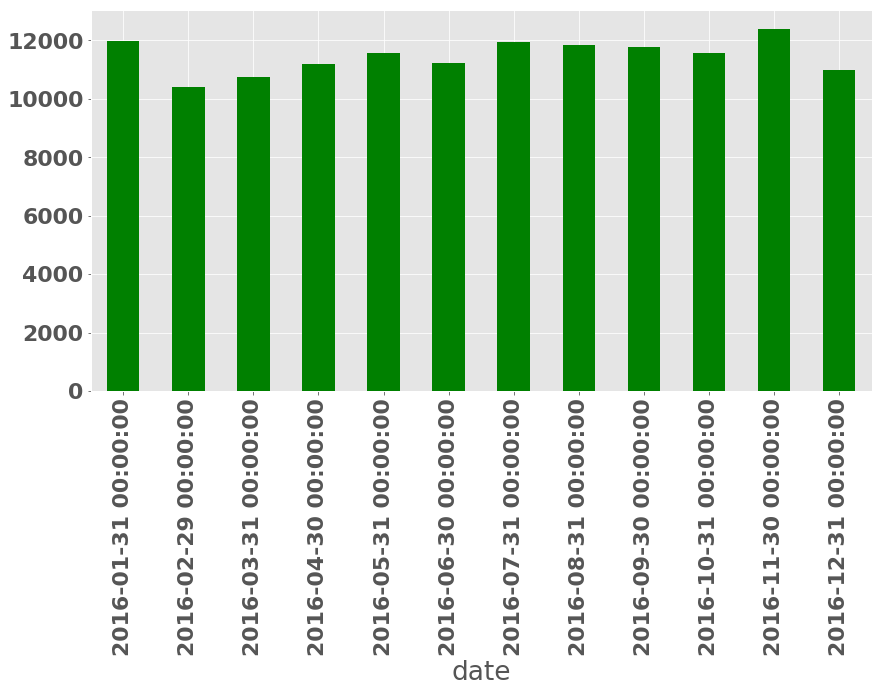

In [25]:
fig = df.set_index('date')['accident_id'].resample('M').count().plot.bar(color='g')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_num_accidents_monthly.png', bbox_inches="tight")

In [26]:
num_casualties_daily = df.set_index('date')['number_of_casualties'].resample('d').sum()

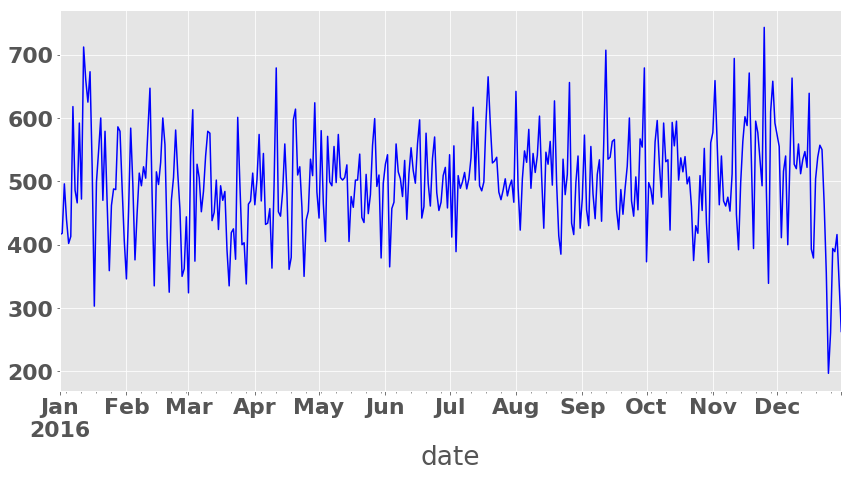

In [27]:
fig = num_casualties_daily.plot(color='b')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_num_casualties_daily.png', bbox_inches="tight")

Day of the week:

In [28]:
df['date'].dt.dayofweek.value_counts()

4    21645
3    21091
2    20320
1    20088
0    19624
5    17961
6    16870
Name: date, dtype: int64

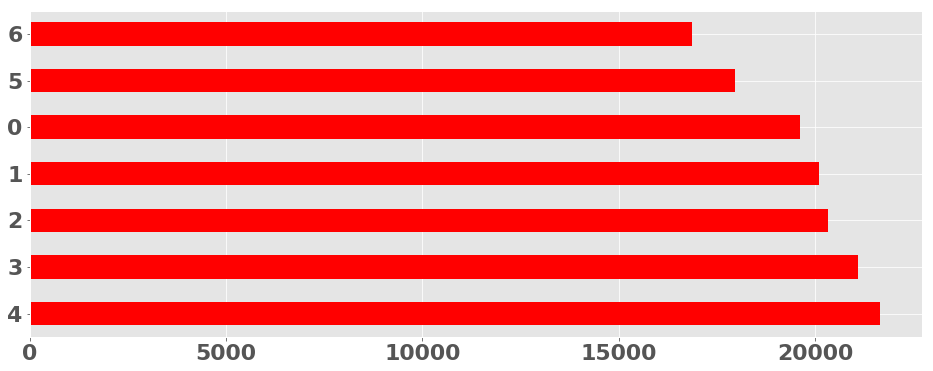

In [29]:
fig = pd.value_counts(df['date'].dt.dayofweek.values, sort=True).plot.barh(
    figsize=(16, 6),
    color='r')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_day_of_the_week.png', bbox_inches="tight")

**Note:** Saturday and Friday are the days with the most accidents

In [30]:
df['day_of_week'] = df['date'].dt.dayofweek

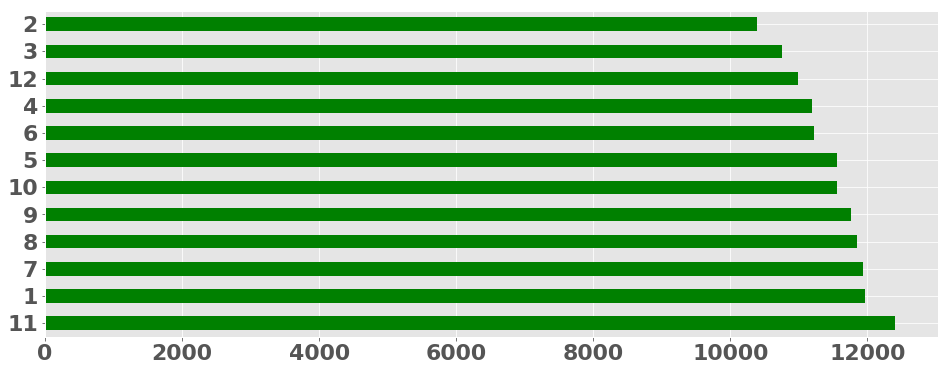

In [31]:
fig = pd.value_counts(df['date'].dt.month.values, sort=True).plot.barh(
    figsize=(16, 6),
    color='g')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_month.png', bbox_inches="tight")

In [32]:
df['month'] = df['date'].dt.month

In [33]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

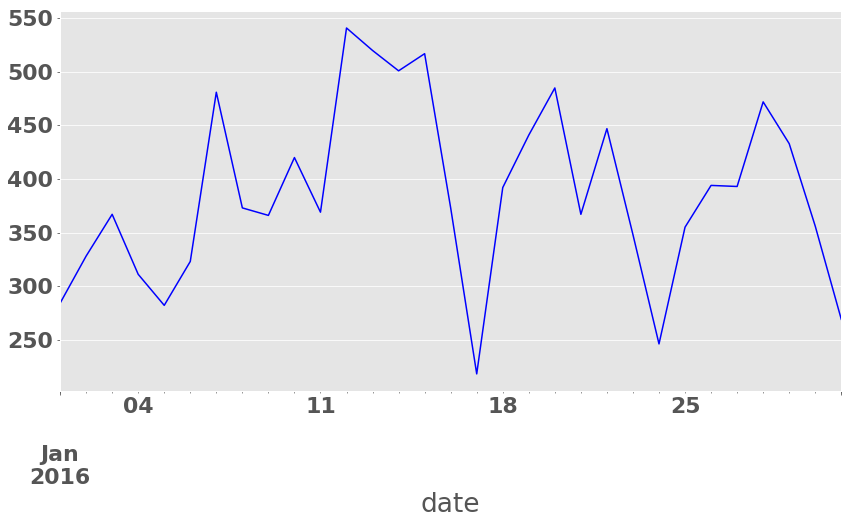

In [34]:
# January
fig = df[df['month'] == 1].set_index('date')['accident_id'].resample('d').count().plot(color='b')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_January_daily.png', bbox_inches="tight")

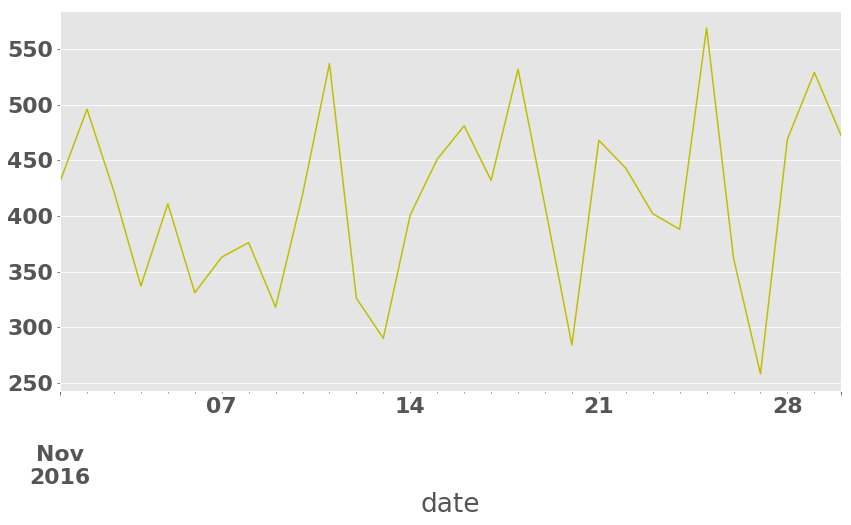

In [35]:
# November
fig = df[df['month'] == 11].set_index('date')['accident_id'].resample('d').count().plot(color='y')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_November_daily.png', bbox_inches="tight")

In [36]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

In [37]:
df['hour'] = df['time'].dt.hour

### Road type

In [38]:
sorted(df['road_type'].unique())

[1, 2, 3, 4, 5, 6]

In [39]:
df['road_type'].value_counts()

4    102427
1     20265
3      8926
2      3140
5      1445
6      1396
Name: road_type, dtype: int64

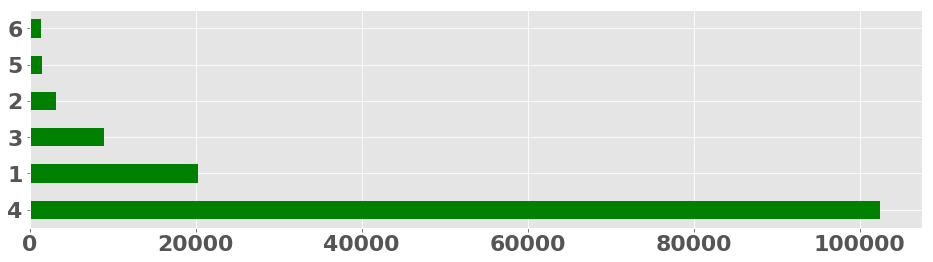

In [40]:
fig = pd.value_counts(df['road_type'].values, sort=True).plot.barh(
    figsize=(16, 4),
    color='g')

In [41]:
fig.get_figure().savefig('../../figures/EDA_road_type.png', bbox_inches="tight")

### Road class

In [42]:
df['1st_road_class'].value_counts()

A               61899
Unclassified    44092
B               16737
C                9436
Motorway         5036
A(M)              399
Name: 1st_road_class, dtype: int64

In [43]:
df['1st_road_number'].value_counts()

0       44579
1        1612
6        1295
4        1249
5         927
25        899
3         843
23        824
40        799
38        796
2         659
27        556
10        548
41        547
11        537
259       536
13        528
20        492
34        491
12        485
30        462
61        453
406       428
24        407
62        395
57        368
47        359
8         358
21        340
46        329
        ...  
3476        1
1429        1
7100        1
5309        1
1215        1
8085        1
8124        1
7701        1
5524        1
4546        1
4802        1
9156        1
1344        1
1472        1
3521        1
918         1
9106        1
4419        1
4547        1
8722        1
7106        1
7234        1
1345        1
3904        1
4476        1
8390        1
4800        1
7958        1
3604        1
3531        1
Name: 1st_road_number, Length: 4180, dtype: int64

In [44]:
df['2nd_road_class'].value_counts()

-1              57375
Unclassified    55734
A               13074
C                5290
B                5185
Motorway          845
A(M)               96
Name: 2nd_road_class, dtype: int64

### Weather & other conditions

In [45]:
df['weather_conditions'].value_counts()

 1    113072
 2     14580
 5      3830
 4      2260
 7      1394
 6      1273
 3       752
 8       350
 9        79
-1         9
Name: weather_conditions, dtype: int64

In [ ]:
fig = pd.value_counts(df['weather_conditions'].values, sort=True).plot.barh(
    figsize=(16, 6),
    color='g')

In [ ]:
fig.get_figure().savefig('../../figures/EDA_weather_conditions.png', bbox_inches="tight")

In [46]:
df['road_surface_conditions'].value_counts()

Dry                     99951
Wet or damp             34434
Frost or ice             2025
-1                        767
Snow                      266
Flood over 3cm. deep      156
Name: road_surface_conditions, dtype: int64

In [47]:
df['special_conditions_at_site'].value_counts()

None                                          134231
Roadworks                                       1437
-1                                               506
Mud                                              324
Oil or diesel                                    309
Road surface defective                           303
Auto traffic signal - out                        285
Road sign or marking defective or obscured       156
Auto signal part defective                        48
Name: special_conditions_at_site, dtype: int64

In [48]:
df['light_conditions'].value_counts()

Daylight                       99672
Darkness - lights lit          27770
Darkness - no lighting          7066
Darkness - lighting unknown     2220
Darkness - lights unlit          862
-1                                 9
Name: light_conditions, dtype: int64

### Speed limit

In [49]:
df['speed_limit'].value_counts()

30.0     85504
60.0     18480
40.0     11509
70.0      9367
20.0      6802
50.0      5722
300.0      215
Name: speed_limit, dtype: int64

### Urban or rural

In [50]:
df['urban_or_rural_area'].value_counts()

Urban    89127
Rural    48472
Name: urban_or_rural_area, dtype: int64

In [51]:
df['local_authority_district'].unique()

array(['Brent', 'Bexley', 'Hillingdon', 'Merton', 'Hounslow', 'Croydon',
       'Westminster', 'Barnet', 'Kensington and Chelsea', 'Greenwich',
       'Haringey', 'Tower Hamlets', 'Barking and Dagenham',
       'Richmond upon Thames', 'Enfield', 'Redbridge', 'Bromley',
       'Havering', 'Wandsworth', 'Southwark', 'Sutton', 'Hackney',
       'Ealing', 'Harrow', 'Lambeth', 'Newham', 'Kingston upon Thames',
       'Camden', 'Hammersmith and Fulham', 'Lewisham', 'Islington',
       'Waltham Forest', 'City of London', 'London Airport (Heathrow)',
       'Carlisle', 'Allerdale', 'Eden', 'South Lakeland', 'Copeland',
       'Barrow-in-Furness', 'Blackpool', 'Blackburn with Darwen',
       'Hyndburn', 'Ribble Valley', 'Pendle', 'Rossendale', 'Burnley',
       'Preston', 'South Ribble', 'Fylde', 'West Lancashire', 'Chorley',
       'Lancaster', 'Wyre', 'Sefton', 'Liverpool', 'Wirral', 'Knowsley',
       'St. Helens', 'Manchester', 'Salford', 'Tameside', 'Stockport',
       'Bolton', 'Wigan', '

Describe some parameters:

In [52]:
df[['number_of_vehicles', 'number_of_casualties', 'speed_limit']].describe()

,number_of_vehicles,number_of_casualties,speed_limit
count,137599.000000,137599.000000,137599.000000
mean,1.848066,1.327292,38.347735
std,0.710954,0.788879,17.434401
min,1.000000,1.000000,20.000000
25%,1.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,40.000000
max,16.000000,58.000000,300.000000


In [53]:
df.groupby('target')[['number_of_vehicles', 'number_of_casualties', 'speed_limit']].describe()

number_of_vehicles                                                \
                    count      mean       std  min  25%  50%  75%   max   
target                                                                    
0                113999.0  1.873648  0.699053  1.0  1.0  2.0  2.0  16.0   
1                 23600.0  1.724492  0.753726  1.0  1.0  2.0  2.0  11.0   

       number_of_casualties            ...            speed_limit             \
                      count      mean  ...  75%   max       count       mean   
target                                 ...                                     
0                  113999.0  1.306362  ...  1.0  27.0    113999.0  37.938140   
1                   23600.0  1.428390  ...  1.0  58.0     23600.0  40.326271   

                                                  
              std   min   25%   50%   75%    max  
target                                            
0       17.894109  20.0  30.0  30.0  40.0  300.0  
1       14.859096  20.0  30.0  30.0  60.0   70.0  

[2 rows x 24 columns]

In [54]:
df.groupby('target')[['number_of_casualties', 'number_of_vehicles', 'speed_limit']].describe().T

target                                  0             1
number_of_casualties count  113999.000000  23600.000000
                     mean        1.306362      1.428390
                     std         0.722923      1.044843
                     min         1.000000      1.000000
                     25%         1.000000      1.000000
                     50%         1.000000      1.000000
                     75%         1.000000      1.000000
                     max        27.000000     58.000000
number_of_vehicles   count  113999.000000  23600.000000
                     mean        1.873648      1.724492
                     std         0.699053      0.753726
                     min         1.000000      1.000000
                     25%         1.000000      1.000000
                     50%         2.000000      2.000000
                     75%         2.000000      2.000000
                     max        16.000000     11.000000
speed_limit          count  113999.000000  23600.000000
                     mean       37.938140     40.326271
                     std        17.894109     14.859096
                     min        20.000000     20.000000
                     25%        30.000000     30.000000
                     50%        30.000000     30.000000
                     75%        40.000000     60.000000
                     max       300.000000     70.000000

### Pedestrian Crossing

In [55]:
df['pedestrian_crossing-human_control'].value_counts()

None within 50 metres                 136383
Control by other authorised person       703
Control by school crossing patrol        331
-1                                       182
Name: pedestrian_crossing-human_control, dtype: int64

In [56]:
df['pedestrian_crossing-physical_facilities'].value_counts()

No physical crossing facilities within 50 metres                             111218
Pedestrian phase at traffic signal junction                                   10249
Pelican, puffin, toucan or similar non-junction pedestrian light crossing      7696
Zebra                                                                          4286
Central refuge                                                                 3237
-1                                                                              628
Footbridge or subway                                                            285
Name: pedestrian_crossing-physical_facilities, dtype: int64

### Junction details

In [57]:
df['junction_detail'].value_counts()

Not at junction or within 20 metres    56788
T or staggered junction                43058
Crossroads                             13311
Roundabout                             11817
Private drive or entrance               4302
Other junction                          3601
Slip road                               1969
Mini-roundabout                         1715
More than 4 arms (not roundabout)        932
-1                                       106
Name: junction_detail, dtype: int64

In [58]:
df['junction_control'].value_counts()

Give way or uncontrolled               64851
-1                                     57008
Auto traffic signal                    14362
Stop sign                                688
Not at junction or within 20 metres      391
Authorised person                        299
Name: junction_control, dtype: int64

### Hazards

In [59]:
df['carriageway_hazards'].value_counts()

None                                               134876
Other object on road                                  970
Any animal in carriageway (except ridden horse)       558
-1                                                    545
Pedestrian in carriageway - not injured               259
Vehicle load on road                                  202
Previous accident                                     189
Name: carriageway_hazards, dtype: int64

### Police

In [60]:
df['police_force'].value_counts()

Metropolitan Police      24967
West Midlands             5964
Kent                      5085
West Yorkshire            5015
Thames Valley             4907
Hampshire                 4418
Sussex                    4179
Surrey                    3772
Essex                     3723
Strathclyde               3714
Lancashire                3705
Devon and Cornwall        3608
South Yorkshire           3068
Avon and Somerset         3055
Greater Manchester        2928
Northumbria               2824
Hertfordshire             2655
Staffordshire             2594
Nottinghamshire           2594
Merseyside                2508
Humberside                2406
Cheshire                  2390
West Mercia               2313
Leicestershire            2189
Cambridgeshire            2167
South Wales               2087
North Yorkshire           2062
Lothian and Borders       2017
Lincolnshire              2002
Derbyshire                1923
Norfolk                   1875
Wiltshire                 1608
Suffolk 

### Location

In [61]:
df['lsoa_of_accident_location'].value_counts()

-1           8408
E01032739     223
E01004736     124
E01033595      92
E01032740      84
E01004689      83
E01030458      68
E01023584      68
E01024335      66
E01023722      65
E01033708      64
E01016012      62
E01004735      62
E01018648      60
E01002444      59
E01003482      59
E01033543      58
E01004763      57
E01004733      57
E01033010      53
E01011107      49
E01033561      48
E01024701      47
E01028521      46
E01017620      45
E01001667      45
E01002003      44
E01032797      44
E01032582      43
E01004734      43
             ... 
E01028774       1
E01029524       1
E01001019       1
E01011963       1
E01032079       1
E01009880       1
E01006131       1
E01025530       1
E01014016       1
E01005237       1
E01018955       1
E01023824       1
W01000713       1
E01015808       1
W01001786       1
E01017761       1
E01017862       1
E01003022       1
E01014925       1
E01024276       1
E01000361       1
E01010098       1
E01005490       1
E01026974       1
E01013686 

In [62]:
df['local_authority_district'].value_counts()

Birmingham                     2816
Leeds                          1945
Westminster                    1556
Glasgow City                   1282
Lambeth                        1281
Cornwall                       1210
Sheffield                      1163
Bradford                       1162
Edinburgh, City of             1153
Wiltshire                      1109
Tower Hamlets                  1097
Liverpool                      1052
Ealing                         1029
Bristol, City of               1024
Southwark                      1009
Barnet                          966
Wandsworth                      957
Brent                           925
Hackney                         908
Croydon                         904
Nottingham                      900
Lewisham                        888
Hounslow                        884
Newham                          874
Haringey                        858
Cheshire East                   853
Leicester                       849
Camden                      

In [63]:
df['local_authority_highway'].value_counts()

Kent                                    4460
Surrey                                  3772
Essex                                   2990
Hampshire                               2979
Lancashire                              2867
Birmingham                              2816
Hertfordshire                           2655
Lincolnshire                            2002
West Sussex                             2002
Leeds                                   1945
Staffordshire                           1923
Norfolk                                 1875
Nottinghamshire                         1694
Suffolk                                 1605
Devon                                   1588
North Yorkshire                         1576
Cambridgeshire                          1562
Westminster                             1556
Oxfordshire                             1505
Warwickshire                            1470
East Sussex                             1393
Derbyshire                              1385
Cumbria   

In [64]:
df['location_easting_osgr'].value_counts()

533650.0    62
531640.0    42
531170.0    38
531650.0    36
532320.0    34
530130.0    32
530760.0    31
532550.0    29
530870.0    28
531570.0    28
531180.0    28
532540.0    27
531900.0    27
532640.0    26
528930.0    26
531460.0    26
533540.0    25
531200.0    25
531100.0    25
534950.0    25
530100.0    25
533670.0    24
531230.0    24
530980.0    24
531220.0    24
530500.0    24
532420.0    24
531150.0    23
532050.0    23
530070.0    23
            ..
338709.0     1
338711.0     1
469785.0     1
338714.0     1
389267.0     1
338718.0     1
338722.0     1
338725.0     1
469800.0     1
469753.0     1
469751.0     1
338677.0     1
338659.0     1
469721.0     1
338651.0     1
469725.0     1
338654.0     1
338655.0     1
469728.0     1
585588.0     1
469733.0     1
484652.0     1
338662.0     1
338664.0     1
555648.0     1
469739.0     1
469742.0     1
338671.0     1
338673.0     1
393216.0     1
Name: location_easting_osgr, Length: 94939, dtype: int64

In [65]:
df['location_northing_osgr'].value_counts()

181570.0    37
181100.0    34
179660.0    33
181180.0    32
181360.0    32
181310.0    32
181730.0    31
181150.0    30
176770.0    29
180990.0    28
181060.0    28
180880.0    28
182780.0    28
181650.0    27
181040.0    27
182180.0    27
180950.0    27
181190.0    27
183670.0    26
178520.0    26
180970.0    26
180820.0    26
181010.0    26
181170.0    26
175710.0    26
182930.0    26
178290.0    25
181120.0    25
181620.0    25
180940.0    25
            ..
69514.0      1
109836.0     1
338743.0     1
201845.0     1
234908.0     1
169373.0     1
234911.0     1
169376.0     1
216527.0     1
338715.0     1
338688.0     1
234893.0     1
234882.0     1
178534.0     1
338695.0     1
99998.0      1
169348.0     1
338699.0     1
677401.0     1
338702.0     1
731448.0     1
338705.0     1
169353.0     1
169354.0     1
234891.0     1
338711.0     1
234892.0     1
239728.0     1
114587.0     1
262144.0     1
Name: location_northing_osgr, Length: 97484, dtype: int64

In [66]:
df['longitude'].value_counts()

-9.920000     11
 0.169946     11
-2.104055     10
-10.820000     9
-10.320000     9
-11.580000     9
-11.520000     9
-10.140000     9
-9.900000      8
-11.100000     8
-11.470000     8
-11.070000     8
-10.960000     8
-11.610000     8
-11.140000     8
-11.220000     8
-10.250000     8
-10.050000     8
-0.041927      8
-10.210000     7
-11.340000     7
-11.490000     7
-10.120000     7
 0.054915      7
-10.500000     7
-9.860000      7
-11.380000     7
-10.900000     7
-10.100000     7
-11.230000     7
              ..
-1.124729      1
-2.868688      1
-0.372086      1
-0.348386      1
-3.131688      1
-1.235373      1
-2.098382      1
-3.502161      1
 0.343428      1
-2.099408      1
-2.649787      1
-0.161939      1
-2.726343      1
-2.780992      1
 1.173111      1
-1.946939      1
-0.591785      1
-2.692900      1
 0.209012      1
-2.603526      1
-0.581079      1
-1.087976      1
 0.264733      1
-0.949891      1
-1.476293      1
-2.129429      1
-0.229437      1
-1.720461     

In [67]:
df['latitude'].value_counts()

51.525146    11
33.820000    10
52.977741    10
51.512868     9
33.620000     8
53.008799     7
53.049154     7
51.570592     7
33.480000     7
51.471012     7
31.590000     7
33.720000     6
51.472941     6
53.014331     6
53.038321     6
52.528992     6
32.590000     6
51.560109     6
51.517161     6
51.378080     6
32.830000     6
31.640000     6
32.750000     6
51.500941     6
34.260000     6
52.504683     6
51.516393     6
53.058098     6
53.049473     6
51.489535     6
             ..
51.474946     1
54.975634     1
53.563292     1
52.722264     1
51.752597     1
51.149861     1
51.452843     1
55.859872     1
51.540127     1
53.398636     1
51.163219     1
53.018189     1
51.919520     1
51.571978     1
52.964252     1
52.470992     1
51.446403     1
55.646440     1
51.363068     1
51.541275     1
51.417221     1
51.201425     1
53.163886     1
51.909374     1
53.652053     1
53.471036     1
54.259477     1
51.510918     1
52.689053     1
52.264935     1
Name: latitude, Length: 